[UCI]:https://archive.ics.uci.edu/ml/datasets/Synthetic+Control+Chart+Time+Series

# Time series classification using a Multilayer Perceptron

This notebook aims to classify the synthetic time-series from the Synthetic Control Chart Time Series Data Set found at [UCI], using a MLP. 

**MLP**  
A MLP "vanilla" neural network consisting at least of three layers of nodes: an input layer, a hidden layer and an output layer.

We min-max scale the time-series. No other feature engineering is done.

In [1]:
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMinMax
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(0)

Using TensorFlow backend.


# Data

In [2]:
data = np.load('data/synthetic_control')

The data consist in 6\*100 time-series of length 60. Each group of a 100 is drawn from a different distribution.  
We plot below examples from each of the groups. 

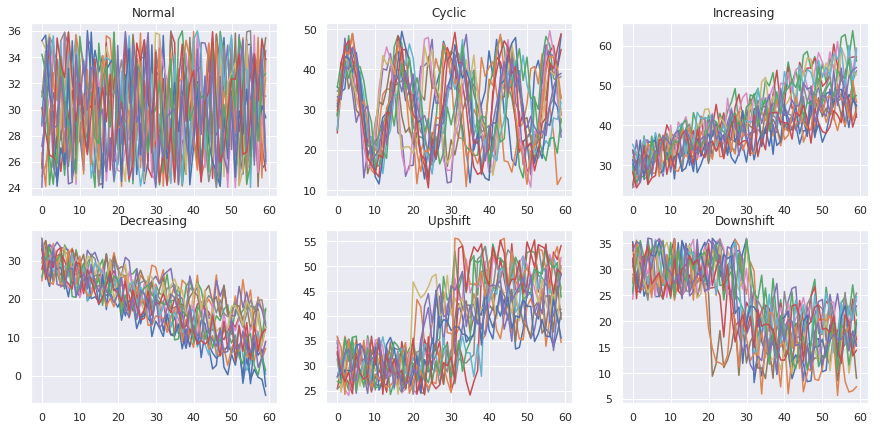

In [3]:
f, axarr = plt.subplots(2, 3, figsize=(15,7))
axarr[0, 0].plot(data[0:15].T)
axarr[0, 0].set_title('Normal')
axarr[0, 1].plot(data[100:115].T)
axarr[0, 1].set_title('Cyclic')
axarr[0, 2].plot(data[200:215].T)
axarr[0, 2].set_title('Increasing')
axarr[1, 0].plot(data[300:315].T)
axarr[1, 0].set_title('Decreasing')
axarr[1, 1].plot(data[400:415].T)
axarr[1, 1].set_title('Upshift')
axarr[1, 2].plot(data[500:515].T)
axarr[1, 2].set_title('Downshift');

In [4]:
true_clusters = np.concatenate(([0]*100 ,[1]*100,[2]*100,[3]*100,[4]*100,[5]*100))
X = TimeSeriesScalerMinMax().fit_transform(data).reshape(data.shape)  # scaling features
y = to_categorical(true_clusters)

# Multilayer perceptron

We first split the data into a train and test set.

## Too many epochs

In [5]:
train_set_size = 350  # 600 total
train_set_index = np.random.choice(np.arange(X.shape[0]), train_set_size, replace=False)
test_set_index = np.setdiff1d(np.arange(X.shape[0]), train_set_index)
X_train = X[train_set_index]
y_train = y[train_set_index]
X_test = X[test_set_index]
y_test = y[test_set_index]

We train a "simple" MLP with 4 layers.

In [6]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=60))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test))
print('\n{} parameters'.format(model.count_params()))

Train on 350 samples, validate on 250 samples
Epoch 1/2000
350/350 [==============================] - 0s 415us/step - loss: 1.8593 - acc: 0.1057 - val_loss: 1.8520 - val_acc: 0.1240
Epoch 2/2000
350/350 [==============================] - 0s 37us/step - loss: 1.8290 - acc: 0.1400 - val_loss: 1.8277 - val_acc: 0.1680
Epoch 3/2000
350/350 [==============================] - 0s 47us/step - loss: 1.8060 - acc: 0.2086 - val_loss: 1.8091 - val_acc: 0.1960
Epoch 4/2000
350/350 [==============================] - 0s 43us/step - loss: 1.7878 - acc: 0.2514 - val_loss: 1.7929 - val_acc: 0.1920
Epoch 5/2000
350/350 [==============================] - 0s 44us/step - loss: 1.7708 - acc: 0.2543 - val_loss: 1.7773 - val_acc: 0.2200
Epoch 6/2000
350/350 [==============================] - 0s 46us/step - loss: 1.7543 - acc: 0.2800 - val_loss: 1.7614 - val_acc: 0.2560
Epoch 7/2000
350/350 [==============================] - 0s 47us/step - loss: 1.7366 - acc: 0.3200 - val_loss: 1.7442 - val_acc: 0.2880
Epoch 8/

Epoch 61/2000
350/350 [==============================] - 0s 38us/step - loss: 0.5504 - acc: 0.7743 - val_loss: 0.5656 - val_acc: 0.8520
Epoch 62/2000
350/350 [==============================] - 0s 46us/step - loss: 0.5547 - acc: 0.8029 - val_loss: 0.5749 - val_acc: 0.8240
Epoch 63/2000
350/350 [==============================] - 0s 44us/step - loss: 0.5446 - acc: 0.8229 - val_loss: 0.5705 - val_acc: 0.7320
Epoch 64/2000
350/350 [==============================] - 0s 42us/step - loss: 0.5398 - acc: 0.7971 - val_loss: 0.5482 - val_acc: 0.8640
Epoch 65/2000
350/350 [==============================] - 0s 48us/step - loss: 0.5349 - acc: 0.8257 - val_loss: 0.5439 - val_acc: 0.8240
Epoch 66/2000
350/350 [==============================] - 0s 46us/step - loss: 0.5215 - acc: 0.8086 - val_loss: 0.5309 - val_acc: 0.8560
Epoch 67/2000
350/350 [==============================] - 0s 48us/step - loss: 0.5183 - acc: 0.8429 - val_loss: 0.5518 - val_acc: 0.7240
Epoch 68/2000
350/350 [=========================

350/350 [==============================] - 0s 43us/step - loss: 0.2851 - acc: 0.9314 - val_loss: 0.3217 - val_acc: 0.9200
Epoch 122/2000
350/350 [==============================] - 0s 39us/step - loss: 0.2911 - acc: 0.9200 - val_loss: 0.3278 - val_acc: 0.8920
Epoch 123/2000
350/350 [==============================] - 0s 53us/step - loss: 0.2797 - acc: 0.9286 - val_loss: 0.3248 - val_acc: 0.8920
Epoch 124/2000
350/350 [==============================] - 0s 46us/step - loss: 0.2732 - acc: 0.9343 - val_loss: 0.3267 - val_acc: 0.8920
Epoch 125/2000
350/350 [==============================] - 0s 45us/step - loss: 0.2702 - acc: 0.9286 - val_loss: 0.3391 - val_acc: 0.8760
Epoch 126/2000
350/350 [==============================] - 0s 53us/step - loss: 0.2637 - acc: 0.9371 - val_loss: 0.3221 - val_acc: 0.8840
Epoch 127/2000
350/350 [==============================] - 0s 45us/step - loss: 0.2673 - acc: 0.9257 - val_loss: 0.3130 - val_acc: 0.8960
Epoch 128/2000
350/350 [==============================] 

Epoch 181/2000
350/350 [==============================] - 0s 41us/step - loss: 0.1589 - acc: 0.9514 - val_loss: 0.2661 - val_acc: 0.9160
Epoch 182/2000
350/350 [==============================] - 0s 40us/step - loss: 0.1549 - acc: 0.9600 - val_loss: 0.2649 - val_acc: 0.9160
Epoch 183/2000
350/350 [==============================] - 0s 45us/step - loss: 0.1595 - acc: 0.9514 - val_loss: 0.2800 - val_acc: 0.9040
Epoch 184/2000
350/350 [==============================] - 0s 45us/step - loss: 0.1594 - acc: 0.9514 - val_loss: 0.3111 - val_acc: 0.8760
Epoch 185/2000
350/350 [==============================] - 0s 43us/step - loss: 0.1558 - acc: 0.9486 - val_loss: 0.2672 - val_acc: 0.9160
Epoch 186/2000
350/350 [==============================] - 0s 47us/step - loss: 0.1504 - acc: 0.9543 - val_loss: 0.2760 - val_acc: 0.9120
Epoch 187/2000
350/350 [==============================] - 0s 49us/step - loss: 0.1512 - acc: 0.9600 - val_loss: 0.2631 - val_acc: 0.9160
Epoch 188/2000
350/350 [=================

Epoch 241/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0947 - acc: 0.9829 - val_loss: 0.2622 - val_acc: 0.9200
Epoch 242/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0974 - acc: 0.9771 - val_loss: 0.2881 - val_acc: 0.9080
Epoch 243/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0943 - acc: 0.9800 - val_loss: 0.2912 - val_acc: 0.9080
Epoch 244/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0921 - acc: 0.9800 - val_loss: 0.2950 - val_acc: 0.9160
Epoch 245/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0903 - acc: 0.9829 - val_loss: 0.2617 - val_acc: 0.9200
Epoch 246/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0896 - acc: 0.9829 - val_loss: 0.2806 - val_acc: 0.9160
Epoch 247/2000
350/350 [==============================] - 0s 49us/step - loss: 0.1079 - acc: 0.9714 - val_loss: 0.2652 - val_acc: 0.9160
Epoch 248/2000
350/350 [=================

Epoch 301/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0631 - acc: 0.9857 - val_loss: 0.2830 - val_acc: 0.9240
Epoch 302/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0644 - acc: 0.9914 - val_loss: 0.3071 - val_acc: 0.8920
Epoch 303/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0684 - acc: 0.9914 - val_loss: 0.2881 - val_acc: 0.9200
Epoch 304/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0596 - acc: 0.9914 - val_loss: 0.2925 - val_acc: 0.9120
Epoch 305/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0602 - acc: 0.9857 - val_loss: 0.2803 - val_acc: 0.9280
Epoch 306/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0587 - acc: 0.9914 - val_loss: 0.2919 - val_acc: 0.9120
Epoch 307/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0569 - acc: 0.9943 - val_loss: 0.2983 - val_acc: 0.9200
Epoch 308/2000
350/350 [=================

Epoch 361/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0389 - acc: 0.9971 - val_loss: 0.3331 - val_acc: 0.9040
Epoch 362/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0440 - acc: 0.9914 - val_loss: 0.3065 - val_acc: 0.9240
Epoch 363/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0406 - acc: 0.9914 - val_loss: 0.3258 - val_acc: 0.9080
Epoch 364/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0450 - acc: 0.9914 - val_loss: 0.3087 - val_acc: 0.9120
Epoch 365/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0403 - acc: 0.9886 - val_loss: 0.3154 - val_acc: 0.9080
Epoch 366/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0382 - acc: 0.9943 - val_loss: 0.3099 - val_acc: 0.9120
Epoch 367/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0364 - acc: 0.9971 - val_loss: 0.3055 - val_acc: 0.9240
Epoch 368/2000
350/350 [=================

Epoch 421/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0262 - acc: 1.0000 - val_loss: 0.3333 - val_acc: 0.9040
Epoch 422/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0264 - acc: 1.0000 - val_loss: 0.3450 - val_acc: 0.9080
Epoch 423/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0282 - acc: 1.0000 - val_loss: 0.3401 - val_acc: 0.9080
Epoch 424/2000
350/350 [==============================] - 0s 55us/step - loss: 0.0267 - acc: 1.0000 - val_loss: 0.3450 - val_acc: 0.9120
Epoch 425/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0269 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.9080
Epoch 426/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0248 - acc: 1.0000 - val_loss: 0.3395 - val_acc: 0.9080
Epoch 427/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0272 - acc: 1.0000 - val_loss: 0.3312 - val_acc: 0.9160
Epoch 428/2000
350/350 [=================

350/350 [==============================] - 0s 38us/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.3626 - val_acc: 0.9080
Epoch 481/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0189 - acc: 1.0000 - val_loss: 0.3486 - val_acc: 0.9080
Epoch 482/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0189 - acc: 1.0000 - val_loss: 0.3510 - val_acc: 0.9080
Epoch 483/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.3589 - val_acc: 0.9080
Epoch 484/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0177 - acc: 1.0000 - val_loss: 0.3588 - val_acc: 0.9080
Epoch 485/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.3584 - val_acc: 0.9080
Epoch 486/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.3670 - val_acc: 0.9120
Epoch 487/2000
350/350 [==============================] 

Epoch 540/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3672 - val_acc: 0.9080
Epoch 541/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.3657 - val_acc: 0.9120
Epoch 542/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3684 - val_acc: 0.9080
Epoch 543/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.3669 - val_acc: 0.9080
Epoch 544/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0129 - acc: 1.0000 - val_loss: 0.3672 - val_acc: 0.9080
Epoch 545/2000
350/350 [==============================] - 0s 48us/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.3697 - val_acc: 0.9080
Epoch 546/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.3709 - val_acc: 0.9080
Epoch 547/2000
350/350 [=================

Epoch 600/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.3816 - val_acc: 0.9080
Epoch 601/2000
350/350 [==============================] - 0s 35us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.3830 - val_acc: 0.9120
Epoch 602/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.3905 - val_acc: 0.9080
Epoch 603/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.3806 - val_acc: 0.9120
Epoch 604/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3842 - val_acc: 0.9120
Epoch 605/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.3863 - val_acc: 0.9080
Epoch 606/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.3862 - val_acc: 0.9080
Epoch 607/2000
350/350 [=================

Epoch 660/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.3967 - val_acc: 0.9120
Epoch 661/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3908 - val_acc: 0.9120
Epoch 662/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0083 - acc: 1.0000 - val_loss: 0.3917 - val_acc: 0.9120
Epoch 663/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3954 - val_acc: 0.9120
Epoch 664/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3953 - val_acc: 0.9120
Epoch 665/2000
350/350 [==============================] - 0s 55us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.3941 - val_acc: 0.9120
Epoch 666/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.3985 - val_acc: 0.9080
Epoch 667/2000
350/350 [=================

350/350 [==============================] - 0s 40us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4033 - val_acc: 0.9120
Epoch 720/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4036 - val_acc: 0.9120
Epoch 721/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4068 - val_acc: 0.9120
Epoch 722/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4053 - val_acc: 0.9120
Epoch 723/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4060 - val_acc: 0.9080
Epoch 724/2000
350/350 [==============================] - 0s 60us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.4037 - val_acc: 0.9080
Epoch 725/2000
350/350 [==============================] - 0s 48us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.4016 - val_acc: 0.9160
Epoch 726/2000
350/350 [==============================] 

Epoch 779/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4141 - val_acc: 0.9120
Epoch 780/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4170 - val_acc: 0.9120
Epoch 781/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4144 - val_acc: 0.9120
Epoch 782/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4130 - val_acc: 0.9120
Epoch 783/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.4126 - val_acc: 0.9120
Epoch 784/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4114 - val_acc: 0.9120
Epoch 785/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4151 - val_acc: 0.9120
Epoch 786/2000
350/350 [=================

Epoch 839/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4211 - val_acc: 0.9120
Epoch 840/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4204 - val_acc: 0.9120
Epoch 841/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4198 - val_acc: 0.9120
Epoch 842/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4217 - val_acc: 0.9120
Epoch 843/2000
350/350 [==============================] - 0s 52us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.4235 - val_acc: 0.9120
Epoch 844/2000
350/350 [==============================] - 0s 53us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4237 - val_acc: 0.9160
Epoch 845/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4200 - val_acc: 0.9120
Epoch 846/2000
350/350 [=================

Epoch 899/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.4288 - val_acc: 0.9120
Epoch 900/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4305 - val_acc: 0.9120
Epoch 901/2000
350/350 [==============================] - 0s 53us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4310 - val_acc: 0.9120
Epoch 902/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4311 - val_acc: 0.9160
Epoch 903/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4268 - val_acc: 0.9120
Epoch 904/2000
350/350 [==============================] - 0s 51us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4299 - val_acc: 0.9120
Epoch 905/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.4306 - val_acc: 0.9120
Epoch 906/2000
350/350 [=================

Epoch 959/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4355 - val_acc: 0.9120
Epoch 960/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4350 - val_acc: 0.9120
Epoch 961/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4361 - val_acc: 0.9120
Epoch 962/2000
350/350 [==============================] - 0s 36us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4355 - val_acc: 0.9120
Epoch 963/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4359 - val_acc: 0.9120
Epoch 964/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.4356 - val_acc: 0.9120
Epoch 965/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4348 - val_acc: 0.9120
Epoch 966/2000
350/350 [=================

350/350 [==============================] - 0s 39us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4398 - val_acc: 0.9120
Epoch 1019/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4415 - val_acc: 0.9120
Epoch 1020/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4420 - val_acc: 0.9200
Epoch 1021/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4398 - val_acc: 0.9160
Epoch 1022/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4417 - val_acc: 0.9120
Epoch 1023/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4421 - val_acc: 0.9120
Epoch 1024/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.4426 - val_acc: 0.9120
Epoch 1025/2000
350/350 [=========================

350/350 [==============================] - 0s 41us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4471 - val_acc: 0.9160
Epoch 1078/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4496 - val_acc: 0.9200
Epoch 1079/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4479 - val_acc: 0.9200
Epoch 1080/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4478 - val_acc: 0.9160
Epoch 1081/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4484 - val_acc: 0.9200
Epoch 1082/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4491 - val_acc: 0.9200
Epoch 1083/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4475 - val_acc: 0.9160
Epoch 1084/2000
350/350 [=========================

350/350 [==============================] - 0s 39us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4526 - val_acc: 0.9200
Epoch 1137/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4514 - val_acc: 0.9160
Epoch 1138/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4527 - val_acc: 0.9200
Epoch 1139/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4534 - val_acc: 0.9200
Epoch 1140/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4526 - val_acc: 0.9200
Epoch 1141/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4513 - val_acc: 0.9200
Epoch 1142/2000
350/350 [==============================] - 0s 52us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4519 - val_acc: 0.9200
Epoch 1143/2000
350/350 [=========================

350/350 [==============================] - 0s 38us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4573 - val_acc: 0.9200
Epoch 1196/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4577 - val_acc: 0.9200
Epoch 1197/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4573 - val_acc: 0.9200
Epoch 1198/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.4573 - val_acc: 0.9200
Epoch 1199/2000
350/350 [==============================] - 0s 57us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4584 - val_acc: 0.9200
Epoch 1200/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4573 - val_acc: 0.9200
Epoch 1201/2000
350/350 [==============================] - 0s 36us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.4574 - val_acc: 0.9200
Epoch 1202/2000
350/350 [=========================

350/350 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4614 - val_acc: 0.9160
Epoch 1255/2000
350/350 [==============================] - 0s 36us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4625 - val_acc: 0.9200
Epoch 1256/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4619 - val_acc: 0.9200
Epoch 1257/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4614 - val_acc: 0.9200
Epoch 1258/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.4619 - val_acc: 0.9200
Epoch 1259/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4628 - val_acc: 0.9200
Epoch 1260/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.4619 - val_acc: 0.9200
Epoch 1261/2000
350/350 [=========================

350/350 [==============================] - 0s 41us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4657 - val_acc: 0.9200
Epoch 1314/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4659 - val_acc: 0.9200
Epoch 1315/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4656 - val_acc: 0.9200
Epoch 1316/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4678 - val_acc: 0.9200
Epoch 1317/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4673 - val_acc: 0.9200
Epoch 1318/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4660 - val_acc: 0.9200
Epoch 1319/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4655 - val_acc: 0.9200
Epoch 1320/2000
350/350 [=========================

350/350 [==============================] - 0s 48us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4697 - val_acc: 0.9200
Epoch 1373/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4695 - val_acc: 0.9200
Epoch 1374/2000
350/350 [==============================] - 0s 36us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4703 - val_acc: 0.9200
Epoch 1375/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4716 - val_acc: 0.9200
Epoch 1376/2000
350/350 [==============================] - 0s 53us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4712 - val_acc: 0.9200
Epoch 1377/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4708 - val_acc: 0.9200
Epoch 1378/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4710 - val_acc: 0.9200
Epoch 1379/2000
350/350 [=========================

350/350 [==============================] - 0s 45us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4734 - val_acc: 0.9200
Epoch 1432/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4739 - val_acc: 0.9200
Epoch 1433/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4743 - val_acc: 0.9200
Epoch 1434/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4735 - val_acc: 0.9200
Epoch 1435/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4729 - val_acc: 0.9200
Epoch 1436/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4742 - val_acc: 0.9200
Epoch 1437/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.4734 - val_acc: 0.9200
Epoch 1438/2000
350/350 [=========================

350/350 [==============================] - 0s 38us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4771 - val_acc: 0.9200
Epoch 1491/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4776 - val_acc: 0.9200
Epoch 1492/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4781 - val_acc: 0.9200
Epoch 1493/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4779 - val_acc: 0.9200
Epoch 1494/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4777 - val_acc: 0.9200
Epoch 1495/2000
350/350 [==============================] - 0s 55us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4776 - val_acc: 0.9200
Epoch 1496/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4784 - val_acc: 0.9200
Epoch 1497/2000
350/350 [=========================

350/350 [==============================] - 0s 44us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4806 - val_acc: 0.9200
Epoch 1550/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4810 - val_acc: 0.9200
Epoch 1551/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4806 - val_acc: 0.9200
Epoch 1552/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4808 - val_acc: 0.9200
Epoch 1553/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4811 - val_acc: 0.9200
Epoch 1554/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4808 - val_acc: 0.9200
Epoch 1555/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4814 - val_acc: 0.9200
Epoch 1556/2000
350/350 [=========================

350/350 [==============================] - 0s 39us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4837 - val_acc: 0.9200
Epoch 1609/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4835 - val_acc: 0.9200
Epoch 1610/2000
350/350 [==============================] - 0s 36us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4831 - val_acc: 0.9200
Epoch 1611/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4835 - val_acc: 0.9200
Epoch 1612/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4841 - val_acc: 0.9200
Epoch 1613/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4844 - val_acc: 0.9200
Epoch 1614/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4843 - val_acc: 0.9200
Epoch 1615/2000
350/350 [=========================

350/350 [==============================] - 0s 37us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4868 - val_acc: 0.9200
Epoch 1668/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4863 - val_acc: 0.9200
Epoch 1669/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4867 - val_acc: 0.9200
Epoch 1670/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4860 - val_acc: 0.9200
Epoch 1671/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.9200
Epoch 1672/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.9200
Epoch 1673/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4869 - val_acc: 0.9200
Epoch 1674/2000
350/350 [=========================

350/350 [==============================] - 0s 37us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4891 - val_acc: 0.9200
Epoch 1727/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.9200
Epoch 1728/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4888 - val_acc: 0.9200
Epoch 1729/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4889 - val_acc: 0.9200
Epoch 1730/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4892 - val_acc: 0.9200
Epoch 1731/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4897 - val_acc: 0.9200
Epoch 1732/2000
350/350 [==============================] - 0s 48us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4897 - val_acc: 0.9200
Epoch 1733/2000
350/350 [=========================

350/350 [==============================] - 0s 41us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4919 - val_acc: 0.9200
Epoch 1786/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4926 - val_acc: 0.9200
Epoch 1787/2000
350/350 [==============================] - 0s 49us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4921 - val_acc: 0.9200
Epoch 1788/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4920 - val_acc: 0.9200
Epoch 1789/2000
350/350 [==============================] - 0s 50us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4916 - val_acc: 0.9200
Epoch 1790/2000
350/350 [==============================] - 0s 48us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4920 - val_acc: 0.9200
Epoch 1791/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.4921 - val_acc: 0.9200
Epoch 1792/2000
350/350 [=========================

350/350 [==============================] - 0s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4949 - val_acc: 0.9200
Epoch 1845/2000
350/350 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4949 - val_acc: 0.9200
Epoch 1846/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4947 - val_acc: 0.9200
Epoch 1847/2000
350/350 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4949 - val_acc: 0.9200
Epoch 1848/2000
350/350 [==============================] - 0s 41us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4950 - val_acc: 0.9200
Epoch 1849/2000
350/350 [==============================] - 0s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4946 - val_acc: 0.9200
Epoch 1850/2000
350/350 [==============================] - 0s 39us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4946 - val_acc: 0.9200
Epoch 1851/2000
350/350 [=========================

350/350 [==============================] - 0s 47us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4968 - val_acc: 0.9200
Epoch 1904/2000
350/350 [==============================] - 0s 38us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4970 - val_acc: 0.9200
Epoch 1905/2000
350/350 [==============================] - 0s 45us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4968 - val_acc: 0.9200
Epoch 1906/2000
350/350 [==============================] - 0s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4970 - val_acc: 0.9200
Epoch 1907/2000
350/350 [==============================] - 0s 48us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4976 - val_acc: 0.9200
Epoch 1908/2000
350/350 [==============================] - 0s 52us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4976 - val_acc: 0.9200
Epoch 1909/2000
350/350 [==============================] - 0s 47us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4976 - val_acc: 0.9200
Epoch 1910/2000
350/350 [=========================

350/350 [==============================] - 0s 39us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4996 - val_acc: 0.9200
Epoch 1963/2000
350/350 [==============================] - 0s 40us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4998 - val_acc: 0.9200
Epoch 1964/2000
350/350 [==============================] - 0s 37us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4997 - val_acc: 0.9200
Epoch 1965/2000
350/350 [==============================] - 0s 46us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4997 - val_acc: 0.9200
Epoch 1966/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4997 - val_acc: 0.9200
Epoch 1967/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4997 - val_acc: 0.9200
Epoch 1968/2000
350/350 [==============================] - 0s 42us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.5000 - val_acc: 0.9200
Epoch 1969/2000
350/350 [=========================

We now plot the accuracies and losses of both the train and test sets, as a function of the epoch number.

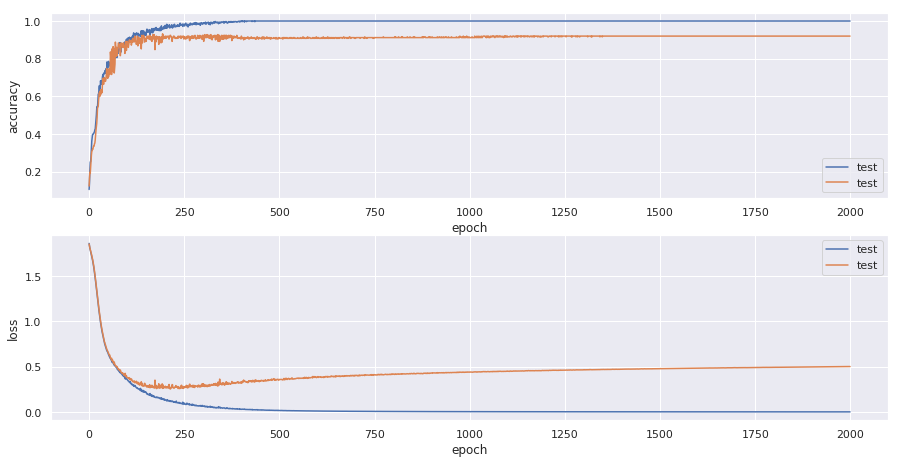

In [7]:
f, axarr = plt.subplots(2, figsize=(15,7.5))
axarr[0].plot(history.history['acc'], label='test')
axarr[0].plot(history.history['val_acc'], label='test')
axarr[0].set_ylabel('accuracy')
axarr[0].set_xlabel('epoch')
axarr[0].legend()

axarr[1].plot(history.history['loss'], label='test')
axarr[1].plot(history.history['val_loss'], label='test')
# plt.title('model loss')
axarr[1].set_ylabel('loss')
axarr[1].set_xlabel('epoch')
axarr[1].legend();

We can see that valuation set losses kink at around epoch 200. This is where we have to stop our model in order to avoid overfitting. While the train set accuracy keeps increasing after that, the test set accuracy does not.
We thus train the same model with 200 epochs and analyze results.

## Early stopping

In [8]:
clf = Sequential()
clf.add(Dense(units=64, activation='relu', input_dim=60))

clf.add(Dense(units=32, activation='relu'))
clf.add(Dense(units=32, activation='relu'))
clf.add(Dense(units=6, activation='softmax'))

clf.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = clf.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
print('\n{} parameters'.format(clf.count_params()))

Train on 350 samples, validate on 250 samples
Epoch 1/200
350/350 [==============================] - 0s 435us/step - loss: 1.8348 - acc: 0.1829 - val_loss: 1.8135 - val_acc: 0.1960
Epoch 2/200
350/350 [==============================] - 0s 56us/step - loss: 1.7960 - acc: 0.2429 - val_loss: 1.7819 - val_acc: 0.2320
Epoch 3/200
350/350 [==============================] - 0s 46us/step - loss: 1.7642 - acc: 0.2800 - val_loss: 1.7542 - val_acc: 0.2640
Epoch 4/200
350/350 [==============================] - 0s 45us/step - loss: 1.7352 - acc: 0.2914 - val_loss: 1.7291 - val_acc: 0.2600
Epoch 5/200
350/350 [==============================] - 0s 44us/step - loss: 1.7081 - acc: 0.2857 - val_loss: 1.7056 - val_acc: 0.2600
Epoch 6/200
350/350 [==============================] - 0s 52us/step - loss: 1.6828 - acc: 0.2829 - val_loss: 1.6825 - val_acc: 0.2560
Epoch 7/200
350/350 [==============================] - 0s 46us/step - loss: 1.6581 - acc: 0.2829 - val_loss: 1.6597 - val_acc: 0.2520
Epoch 8/200
350

350/350 [==============================] - 0s 46us/step - loss: 0.5899 - acc: 0.7257 - val_loss: 0.6087 - val_acc: 0.7160
Epoch 62/200
350/350 [==============================] - 0s 43us/step - loss: 0.5787 - acc: 0.7486 - val_loss: 0.5911 - val_acc: 0.7800
Epoch 63/200
350/350 [==============================] - 0s 49us/step - loss: 0.5754 - acc: 0.7686 - val_loss: 0.5988 - val_acc: 0.7200
Epoch 64/200
350/350 [==============================] - 0s 45us/step - loss: 0.5651 - acc: 0.8000 - val_loss: 0.5951 - val_acc: 0.7040
Epoch 65/200
350/350 [==============================] - 0s 49us/step - loss: 0.5657 - acc: 0.7657 - val_loss: 0.5946 - val_acc: 0.6760
Epoch 66/200
350/350 [==============================] - 0s 50us/step - loss: 0.5558 - acc: 0.7686 - val_loss: 0.5813 - val_acc: 0.7440
Epoch 67/200
350/350 [==============================] - 0s 45us/step - loss: 0.5492 - acc: 0.7800 - val_loss: 0.5682 - val_acc: 0.7720
Epoch 68/200
350/350 [==============================] - 0s 52us/step

350/350 [==============================] - 0s 40us/step - loss: 0.3077 - acc: 0.9114 - val_loss: 0.3716 - val_acc: 0.8840
Epoch 122/200
350/350 [==============================] - 0s 41us/step - loss: 0.3094 - acc: 0.9000 - val_loss: 0.3634 - val_acc: 0.8840
Epoch 123/200
350/350 [==============================] - 0s 43us/step - loss: 0.3033 - acc: 0.9200 - val_loss: 0.3672 - val_acc: 0.8760
Epoch 124/200
350/350 [==============================] - 0s 43us/step - loss: 0.2942 - acc: 0.9257 - val_loss: 0.3514 - val_acc: 0.8920
Epoch 125/200
350/350 [==============================] - 0s 46us/step - loss: 0.2931 - acc: 0.9114 - val_loss: 0.3544 - val_acc: 0.8960
Epoch 126/200
350/350 [==============================] - 0s 50us/step - loss: 0.2850 - acc: 0.9343 - val_loss: 0.3423 - val_acc: 0.8960
Epoch 127/200
350/350 [==============================] - 0s 51us/step - loss: 0.2817 - acc: 0.9343 - val_loss: 0.3364 - val_acc: 0.8840
Epoch 128/200
350/350 [==============================] - 0s 43

350/350 [==============================] - 0s 39us/step - loss: 0.1157 - acc: 0.9743 - val_loss: 0.2185 - val_acc: 0.9200
Epoch 182/200
350/350 [==============================] - 0s 36us/step - loss: 0.1180 - acc: 0.9743 - val_loss: 0.2128 - val_acc: 0.9320
Epoch 183/200
350/350 [==============================] - 0s 35us/step - loss: 0.1113 - acc: 0.9800 - val_loss: 0.2115 - val_acc: 0.9320
Epoch 184/200
350/350 [==============================] - 0s 41us/step - loss: 0.1130 - acc: 0.9800 - val_loss: 0.2108 - val_acc: 0.9320
Epoch 185/200
350/350 [==============================] - 0s 40us/step - loss: 0.1124 - acc: 0.9771 - val_loss: 0.2206 - val_acc: 0.9280
Epoch 186/200
350/350 [==============================] - 0s 47us/step - loss: 0.1082 - acc: 0.9857 - val_loss: 0.2323 - val_acc: 0.9200
Epoch 187/200
350/350 [==============================] - 0s 46us/step - loss: 0.1116 - acc: 0.9771 - val_loss: 0.2102 - val_acc: 0.9320
Epoch 188/200
350/350 [==============================] - 0s 43

Final test set accuracy is 94% (with 99% accuracy on the train set).  
Let us look at the model prediction, in order to better understand where the model fails.

In [9]:
prediction = np.argmax(clf.predict(X), axis=1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

The results are pretty good: errors seem randomly scattered. There is thus no bias or difficulty to tell two specific classes apart for the MLP.

# Errors analysis
We now plot some misclassified series.

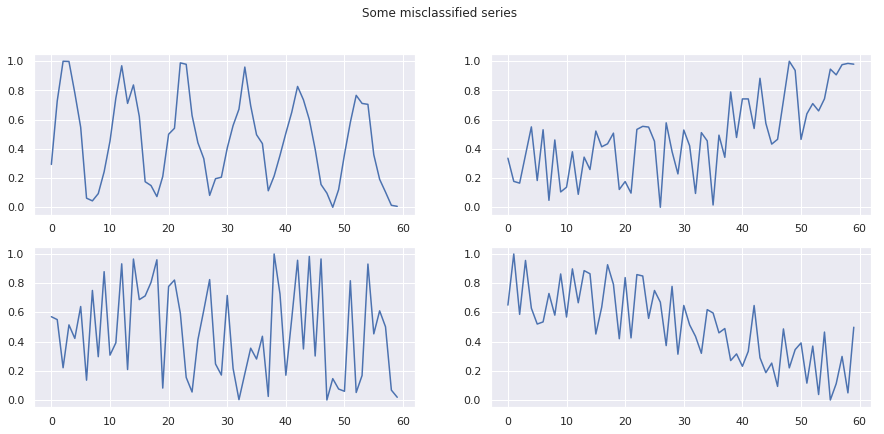

In [10]:
misclassified_id = np.where(prediction != true_clusters)[0]  # array of all misclassified ts indices

f, axarr = plt.subplots(2, 2, figsize=(15,6.5))
for i,j in product([0,1],[0,1]):
    axarr[i,j].plot(X[np.random.choice(misclassified_id)])
f.suptitle('Some misclassified series');

The above misclassified series are quite easy for a human to classify.